# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,precision_score,recall_score

In [2]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
print(data.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


# Missing Values

<AxesSubplot:>

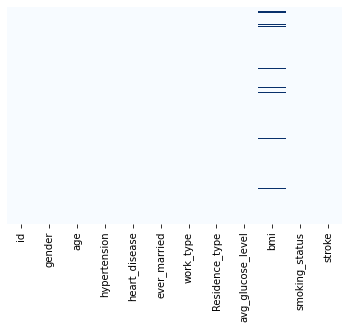

In [5]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [6]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [7]:
data['stroke'].unique()

array([1, 0], dtype=int64)

Text(0.5, 0, 'Stroke')

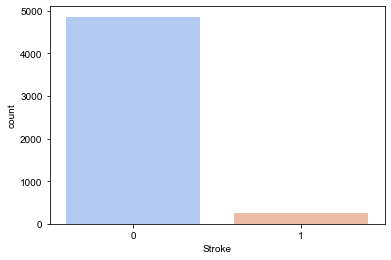

In [8]:
sns.countplot(x='stroke',data=data,palette = 'coolwarm')
sns.set_style('darkgrid')
plt.xlabel('Stroke')


In [9]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [10]:
#lets calculate the percentage
data_stroke=len(data[data['stroke']==1])
data_healthy=len(data[data['stroke']==0])
perc_stroke=data_stroke/(data_stroke+data_healthy)
perc_healthy=data_healthy/(data_stroke+data_healthy)
print("Percentage of people who suffered stroke=",perc_stroke*100)
print("Percentage of people who are healthy=",perc_healthy*100)

Percentage of people who suffered stroke= 4.87279843444227
Percentage of people who are healthy= 95.12720156555773


In [11]:
#Presence of minority class in the dataset

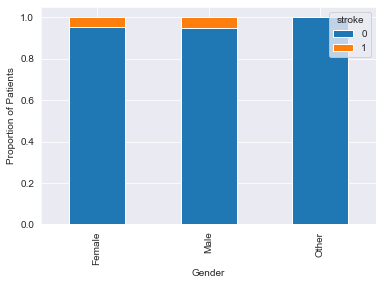

In [12]:
table=pd.crosstab(data.gender,data.stroke)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Gender')
plt.ylabel('Proportion of Patients')
plt.show()

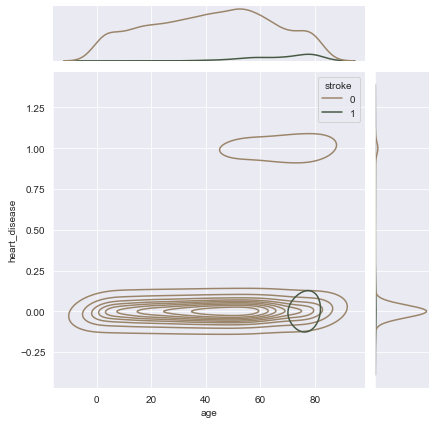

In [13]:
sns.jointplot(data=data,x='age',y='heart_disease',hue='stroke',kind='kde',palette=['#9B856A', '#475943'])


<AxesSubplot:>

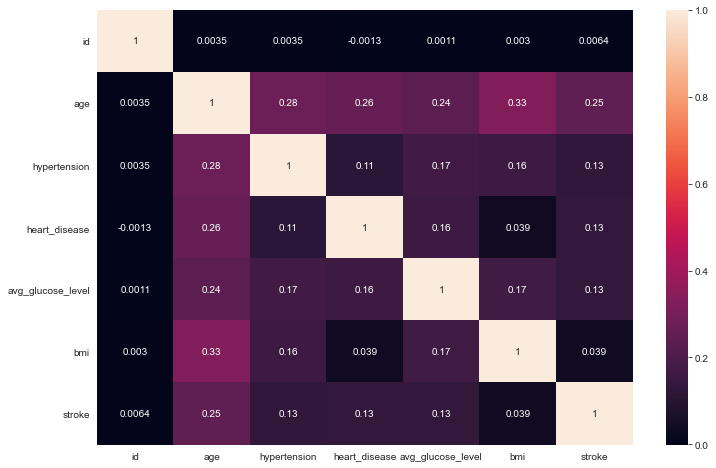

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

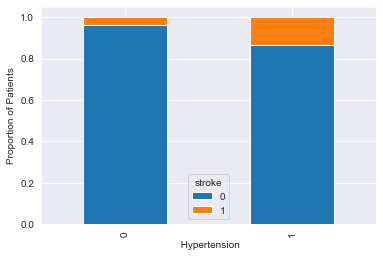

In [15]:
table=pd.crosstab(data.hypertension,data.stroke)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel(' Hypertension')
plt.ylabel('Proportion of Patients')
plt.show()

<AxesSubplot:xlabel='heart_disease', ylabel='age'>

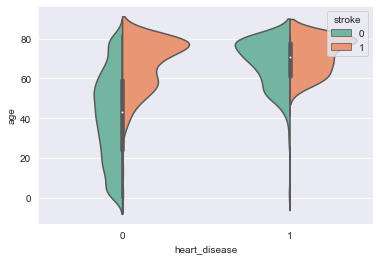

In [16]:
sns.violinplot(data=data,x='heart_disease',y='age',hue='stroke',split=True,palette='Set2')

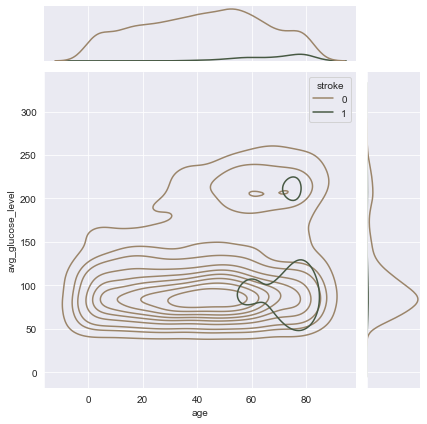

In [17]:
sns.jointplot(data=data,x='age',y='avg_glucose_level',hue='stroke',kind='kde',palette=['#9B856A', '#475943'])

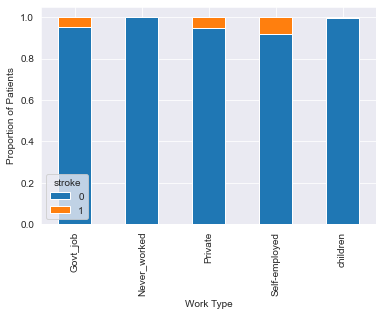

In [18]:
table=pd.crosstab(data.work_type,data.stroke)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Work Type')
plt.ylabel('Proportion of Patients')
plt.show()

In [19]:
data=data.drop(columns=['id'])

In [20]:
data.groupby('stroke').mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,
0,41.971545,0.088871,0.047110,104.795513,28.825388
1,67.728193,0.265060,0.188755,132.544739,30.217789


In [21]:
data.groupby('hypertension').mean()

,age,heart_disease,avg_glucose_level,bmi,stroke
hypertension,,,,,
0,41.173027,0.045967,103.551715,28.488066,0.039679
1,62.244980,0.128514,130.188996,32.645546,0.132530


In [22]:
data.groupby('smoking_status').mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
smoking_status,,,,,,
Unknown,30.229922,0.033679,0.031088,99.601541,25.793839,0.030440
formerly smoked,54.929944,0.135593,0.087006,112.886079,30.646639,0.079096
never smoked,46.744715,0.122622,0.047569,107.558092,29.959529,0.047569
smokes,47.096324,0.119138,0.077313,108.017440,30.434789,0.053232


# Converting categorical variables

In [23]:
def smoke_feature(text):
    if text =='never smoked' or text =='Unknown':
        return 'never smoked'
    else:
        return 'smoke'

In [24]:
data['smoking_status']=data['smoking_status'].apply(smoke_feature)

In [25]:
obj_feat=data.dtypes[data.dtypes=='O'].index.values

In [26]:
le=LabelEncoder()

for i in obj_feat:
    data[i]=le.fit_transform(data[i])

In [27]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

#  Reducing over sampling using SMOTE(Synthetic Minority Oversampling)
     1.Presence of Minority class in the Dataset
     2.Imbalanced dataset leads to -Biased predictions and Misleading Accuracy

In [28]:
X = data.drop('stroke', axis=1)
y = data['stroke']

In [29]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,0
2,1,80.0,0,1,1,2,0,105.92,32.500000,0
3,0,49.0,0,0,1,2,1,171.23,34.400000,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,0
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [30]:
os=SMOTE(random_state=0)

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
columns=X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train,y_train)
os_data_X=pd.DataFrame(data=os_data_X,columns=columns)
os_data_y=pd.DataFrame(data=os_data_y,columns=['stroke'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of Healthy people in oversampled data",len(os_data_y[os_data_y['stroke']==0]))
print("Number of stroke",len(os_data_y[os_data_y['stroke']==1]))
print("Proportion of healthy people  data in oversampled data is ",len(os_data_y[os_data_y['stroke']==0])/len(os_data_X))
print("Proportion of stroke data in oversampled data is ",len(os_data_y[os_data_y['stroke']==1])/len(os_data_X))

length of oversampled data is  6808
Number of Healthy people in oversampled data 3404
Number of stroke 3404
Proportion of healthy people  data in oversampled data is  0.5
Proportion of stroke data in oversampled data is  0.5


Text(0.5, 0, 'Stroke')

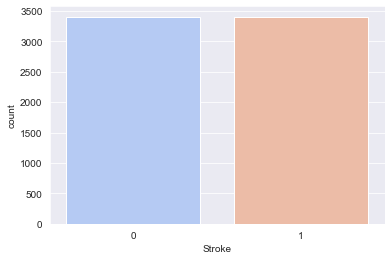

In [32]:
sns.countplot(x='stroke',data=os_data_y,palette = 'coolwarm')
sns.set_style('darkgrid')
plt.xlabel('Stroke')

In [33]:
X=os_data_X
y=os_data_y['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [34]:

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state =0)
random_forest_model.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [35]:
predict_train_data = random_forest_model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

# Performance Measures

In [37]:
acc = accuracy_score(y_test,predict_train_data)
accuracy = acc*100
print(str(accuracy)+"%")

94.46891825746452%


In [38]:
confusion_matrix(y_test,predict_train_data)

array([[949,  77],
       [ 36, 981]], dtype=int64)

In [39]:
precision_score(y_test,predict_train_data)

0.9272211720226843

In [40]:
recall_score(y_test,predict_train_data)

0.9646017699115044